# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    return (x**2)*numpy.sin(x)

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    return (2*x*numpy.sin(x))+(2-x**2)*numpy.cos(x)-2
    

Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    max_value = g(xmax)
    min_value = f(xmin)
    difference = max_value-min_value 
    return difference 
    

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [10]:
def integrate_numeric(xmin, xmax, N):
    A = 0
    B = 0
    delx = (xmax - xmin)/(N)
    for i in range (0,N):
        B =B+4*f(xmin+(delx*(((2*i)+1)/2)))
    for j in range (1,N):
        A = A+2*f(xmin+(delx*j))
        
    return (delx/6)*((B+A+f(xmin)+f(xmax)))




Make sure you have implemented Simpson's rule correctly:

In [ ]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [ ]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0,0.5,'log(fractional error)')

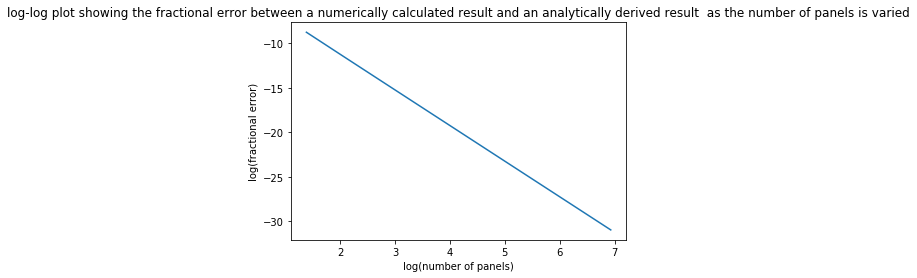

In [18]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
yvalues=[]
j = 0 
for j in range (0,9):
    yvalues.append ((integrate_analytic(x0,x1)-integrate_numeric(x0,x1,(2**(j+2))))/integrate_analytic(x0,x1))
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
plt.plot(numpy.log(panel_counts),numpy.log(yvalues))
plt.title('log-log plot showing the fractional error between a numerically calculated result and an analytically derived result  as the number of panels is varied')  
plt.xlabel('log(number of panels)')
plt.ylabel('log(fractional error)')
    

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Up to a given maximum value, increasing the number of panels increases the accuracy for the method of numerical integration as it correlates closer to the function. However if the number of panels is taken to be too large the accuracy decreases, the resolution of delx has gone smaller than that of pythons and thus python will "skip" steps and therefore making the result less accurate. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

If the trapezuim rule is being used, increasing the number of panels will drastically increase the accuracy of the result. This is because it will correlate closer to the given function and therefore give an area closer to that of the true value. 
